downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/radhanikapoor/scikit_learn_data


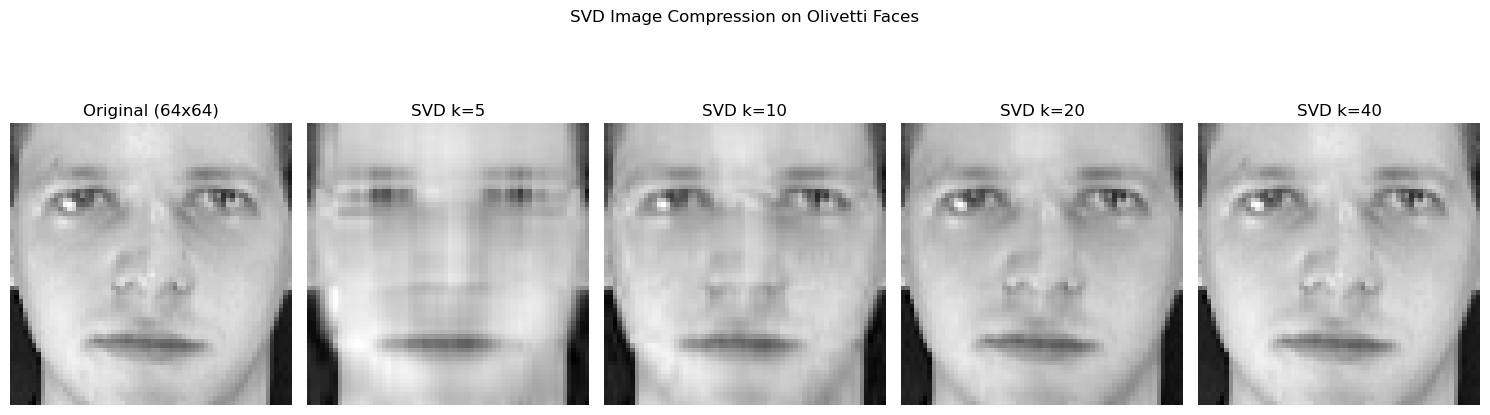

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti Faces dataset
faces = fetch_olivetti_faces()
images = faces.images  # shape: (400, 64, 64)

# Select one image to demonstrate SVD compression
original_image = images[0]

# Function to compress an image using SVD with a given number of components
def svd_compress(image, k):
    U, S, VT = np.linalg.svd(image, full_matrices=False)
    S_k = np.diag(S[:k])
    compressed = U[:, :k] @ S_k @ VT[:k, :]
    return compressed

# Visualize original and compressed versions for multiple values of k
ks = [5, 10, 20, 40]
fig, axes = plt.subplots(1, len(ks) + 1, figsize=(15, 5))

# Plot original
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original (64x64)")
axes[0].axis('off')

# Plot compressed versions
for i, k in enumerate(ks):
    compressed_img = svd_compress(original_image, k)
    axes[i + 1].imshow(compressed_img, cmap='gray')
    axes[i + 1].set_title(f"SVD k={k}")
    axes[i + 1].axis('off')

plt.suptitle("SVD Image Compression on Olivetti Faces")
plt.tight_layout()
plt.show()


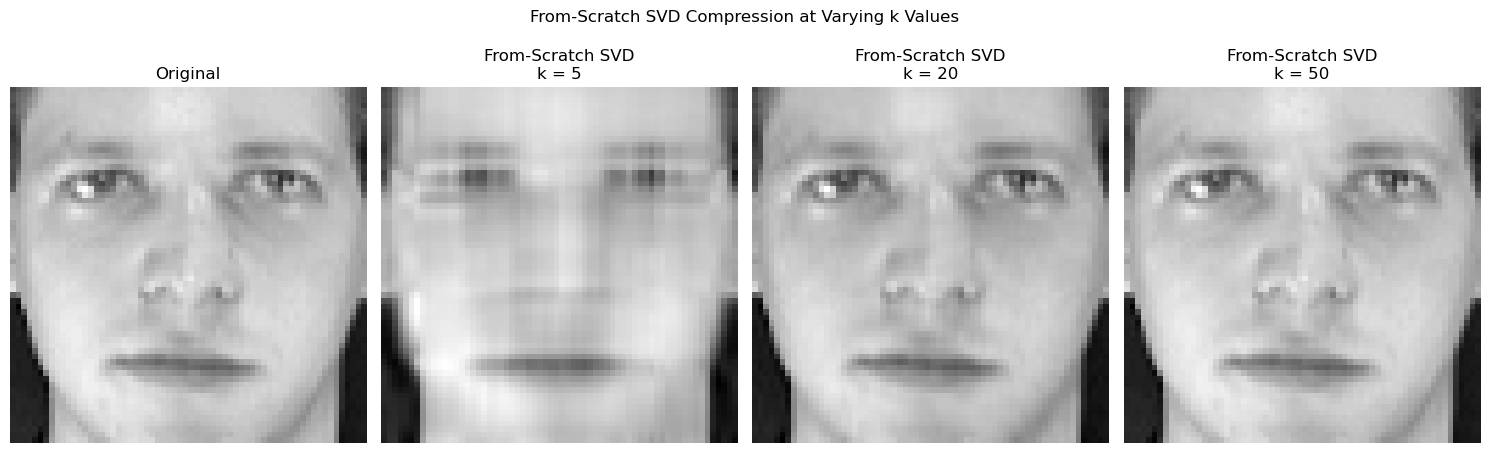

In [3]:

# Reload Olivetti faces dataset
faces = fetch_olivetti_faces()
image = faces.images[0]

# From-scratch approximation: Top-k SVD using power iteration
def power_iteration_svd(A, k, n_iter=100):
    m, n = A.shape
    U, S, VT = [], [], []

    A_copy = A.copy()
    for _ in range(k):
        # Step 1: initialize random vector
        x = np.random.rand(n)
        for _ in range(n_iter):
            x = A_copy.T @ (A_copy @ x)
            x /= np.linalg.norm(x)

        # Step 2: compute singular value and corresponding vectors
        Av = A_copy @ x
        sigma = np.linalg.norm(Av)
        u = Av / sigma
        v = x

        # Step 3: deflate the matrix
        A_copy -= sigma * np.outer(u, v)

        # Store results
        U.append(u)
        S.append(sigma)
        VT.append(v)

    U = np.stack(U, axis=1)
    S = np.array(S)
    VT = np.stack(VT)
    return U, S, VT

# Compress image using from-scratch SVD
k = 20
U, S, VT = power_iteration_svd(image, k)
compressed_image = U @ np.diag(S) @ VT

# Apply from-scratch SVD for multiple k values
ks = [5, 20, 50]
reconstructed_images = []

for k in ks:
    U_k, S_k, VT_k = power_iteration_svd(image, k)
    compressed_k = U_k @ np.diag(S_k) @ VT_k
    reconstructed_images.append((k, compressed_k))

# Plot original and reconstructed images side by side
fig, axes = plt.subplots(1, len(ks) + 1, figsize=(15, 5))

# Original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# Compressed images
for i, (k, img_k) in enumerate(reconstructed_images):
    axes[i + 1].imshow(img_k, cmap='gray')
    axes[i + 1].set_title(f"From-Scratch SVD\nk = {k}")
    axes[i + 1].axis('off')

plt.suptitle("From-Scratch SVD Compression at Varying k Values")
plt.tight_layout()
plt.show()